In [1]:
import numpy as np
import pandas as pd

In [2]:
df = pd.read_csv('placement.csv')

In [3]:
df.head()

,Unnamed: 0,cgpa,iq,placement
0,0,6.8,123.0,1
1,1,5.9,106.0,0
2,2,5.3,121.0,0
3,3,7.4,132.0,1
4,4,5.8,142.0,0


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 4 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Unnamed: 0  100 non-null    int64  
 1   cgpa        100 non-null    float64
 2   iq          100 non-null    float64
 3   placement   100 non-null    int64  
dtypes: float64(2), int64(2)
memory usage: 3.3 KB


In [5]:
df.shape

(100, 4)

In [6]:
df = df.iloc[:,1:]

In [7]:
df.head()

,cgpa,iq,placement
0,6.8,123.0,1
1,5.9,106.0,0
2,5.3,121.0,0
3,7.4,132.0,1
4,5.8,142.0,0


In [8]:
import matplotlib.pyplot as plt


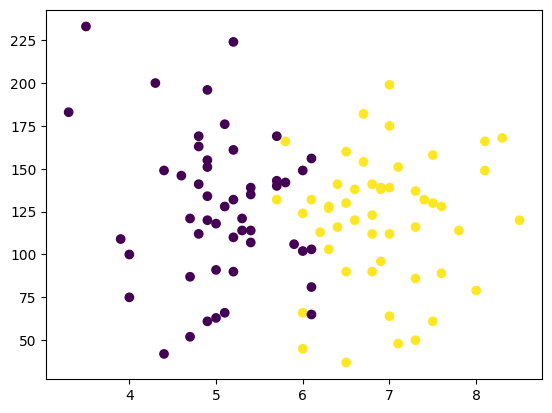

In [9]:
plt.scatter(df['cgpa'],df['iq'],c=df['placement'])

In [10]:
X = df.iloc[:,0:2]
y = df.iloc[:,-1]

In [11]:
X

,cgpa,iq
0,6.8,123.0
1,5.9,106.0
2,5.3,121.0
3,7.4,132.0
4,5.8,142.0
...,...,...
95,4.3,200.0
96,4.4,42.0
97,6.7,182.0
98,6.3,103.0


In [12]:
y.shape

(100,)

In [13]:
from sklearn.model_selection import train_test_split

X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.1)

In [14]:
X_train

,cgpa,iq
79,6.5,90.0
65,8.1,166.0
49,5.4,135.0
73,4.9,61.0
76,4.9,155.0
...,...,...
45,6.0,66.0
28,5.2,90.0
94,4.7,52.0
41,5.4,114.0


In [15]:
y_train

79    1
65    1
49    0
73    0
76    0
     ..
45    1
28    0
94    0
41    0
2     0
Name: placement, Length: 90, dtype: int64

In [16]:
X_test

,cgpa,iq
51,4.8,141.0
7,5.0,63.0
58,8.0,79.0
27,6.0,124.0
11,6.9,138.0
34,4.8,163.0
77,7.3,50.0
1,5.9,106.0
26,7.0,199.0
95,4.3,200.0


In [17]:
from sklearn.preprocessing import StandardScaler

In [18]:
scaler = StandardScaler()

In [19]:
X_train = scaler.fit_transform(X_train)

In [20]:
X_train

array([[ 0.45077862, -0.86574272],
       [ 1.86498604,  1.111446  ],
       [-0.52148899,  0.30496113],
       [-0.96342881, -1.62019631],
       [-0.96342881,  0.82527395],
       [ 0.62755454,  1.52769625],
       [ 2.04176197,  1.16347728],
       [ 0.71594251, -0.86574272],
       [-0.2563251 ,  0.51308625],
       [ 0.45077862,  0.17488292],
       [ 0.27400269,  0.096836  ],
       [-0.2563251 ,  0.2269142 ],
       [ 0.71594251, -0.29339862],
       [-0.69826492,  0.98136779],
       [ 1.33465826, -1.62019631],
       [ 0.0088388 , -0.55355503],
       [-0.78665288,  0.12285164],
       [ 1.24627029,  0.2269142 ],
       [-0.96342881,  1.89191523],
       [-1.40536863,  0.6691801 ],
       [ 0.45077862, -2.2445717 ],
       [-0.69826492,  2.62035318],
       [-2.2008603 ,  2.85449395],
       [ 0.89271844,  0.40902369],
       [-1.14020474, -0.05925785],
       [-0.96342881,  0.72121138],
       [-0.69826492, -0.3454299 ],
       [ 0.80433047, -0.70964887],
       [-0.60987695,

In [21]:
X_test = scaler.transform(X_test)

In [22]:
X_test

array([[-1.05181677,  0.46105497],
       [-0.87504084, -1.56816503],
       [ 1.77659808, -1.15191477],
       [ 0.0088388 ,  0.01878907],
       [ 0.80433047,  0.38300805],
       [-1.05181677,  1.03339907],
       [ 1.15788233, -1.90636836],
       [-0.07954917, -0.44949246],
       [ 0.89271844,  1.96996215],
       [-1.49375659,  1.99597779]])

In [23]:
from sklearn.linear_model import LogisticRegression

In [24]:
clf = LogisticRegression()

In [25]:
# model training
clf.fit(X_train,y_train)

,"penalty penalty: {'l1', 'l2', 'elasticnet', None}, default='l2'Specify the norm of the penalty:- `None`: no penalty is added;- `'l2'`: add a L2 penalty term and it is the default choice;- `'l1'`: add a L1 penalty term;- `'elasticnet'`: both L1 and L2 penalty terms are added... warning:: Some penalties may not work with some solvers. See the parameter `solver` below, to know the compatibility between the penalty and solver... versionadded:: 0.19 l1 penalty with SAGA solver (allowing 'multinomial' + L1).. deprecated:: 1.8 `penalty` was deprecated in version 1.8 and will be removed in 1.10. Use `l1_ratio` instead. `l1_ratio=0` for `penalty='l2'`, `l1_ratio=1` for `penalty='l1'` and `l1_ratio` set to any float between 0 and 1 for `'penalty='elasticnet'`.",'deprecated'
,"C C: float, default=1.0Inverse of regularization strength; must be a positive float.Like in support vector machines, smaller values specify strongerregularization. `C=np.inf` results in unpenalized logistic regression.For a visual example on the effect of tuning the `C` parameterwith an L1 penalty, see::ref:`sphx_glr_auto_examples_linear_model_plot_logistic_path.py`.",1.0
,"l1_ratio l1_ratio: float, default=0.0The Elastic-Net mixing parameter, with `0 <= l1_ratio <= 1`. Setting`l1_ratio=1` gives a pure L1-penalty, setting `l1_ratio=0` a pure L2-penalty.Any value between 0 and 1 gives an Elastic-Net penalty of the form`l1_ratio * L1 + (1 - l1_ratio) * L2`... warning:: Certain values of `l1_ratio`, i.e. some penalties, may not work with some solvers. See the parameter `solver` below, to know the compatibility between the penalty and solver... versionchanged:: 1.8 Default value changed from None to 0.0... deprecated:: 1.8 `None` is deprecated and will be removed in version 1.10. Always use `l1_ratio` to specify the penalty type.",0.0
,"dual dual: bool, default=FalseDual (constrained) or primal (regularized, see also:ref:`this equation `) formulation. Dual formulationis only implemented for l2 penalty with liblinear solver. Prefer `dual=False`when n_samples > n_features.",False
,"tol tol: float, default=1e-4Tolerance for stopping criteria.",0.0001
,"fit_intercept fit_intercept: bool, default=TrueSpecifies if a constant (a.k.a. bias or intercept) should beadded to the decision function.",True
,"intercept_scaling intercept_scaling: float, default=1Useful only when the solver `liblinear` is usedand `self.fit_intercept` is set to `True`. In this case, `x` becomes`[x, self.intercept_scaling]`,i.e. a ""synthetic"" feature with constant value equal to`intercept_scaling` is appended to the instance vector.The intercept becomes``intercept_scaling * synthetic_feature_weight``... note:: The synthetic feature weight is subject to L1 or L2 regularization as all other features. To lessen the effect of regularization on synthetic feature weight (and therefore on the intercept) `intercept_scaling` has to be increased.",1
,"class_weight class_weight: dict or 'balanced', default=NoneWeights associated with classes in the form ``{class_label: weight}``.If not given, all classes are supposed to have weight one.The ""balanced"" mode uses the values of y to automatically adjustweights inversely proportional to class frequencies in the input dataas ``n_samples / (n_classes * np.bincount(y))``.Note that these weights will be multiplied with sample_weight (passedthrough the fit method) if sample_weight is specified... versionadded:: 0.17 *class_weight='balanced'*",None
,"random_state random_state: int, RandomState instance, default=NoneUsed when ``solver`` == 'sag', 'saga' or 'liblinear' to shuffle thedata. See :term:`Glossary ` for details.",None
,"solver solver: {'lbfgs', 'liblinear', 'newton-cg', 'newton-cholesky', 'sag', 'saga'}, default='lbfgs'Algorithm to use in the optimization problem. Default is 'lbfgs'.To choose a solver, you might want to consider the following aspects:- 'lbfgs' is a good default solver because it works reasonably well for a wide class of problems.- For :term:`mul

In [26]:
y_pred = clf.predict(X_test)

In [27]:
y_test

51    0
7     0
58    1
27    1
11    1
34    0
77    1
1     0
26    1
95    0
Name: placement, dtype: int64

In [28]:
from sklearn.metrics import accuracy_score

In [29]:
accuracy_score(y_test,y_pred)

1.0

In [30]:
from mlxtend.plotting import plot_decision_regions

<Axes: >

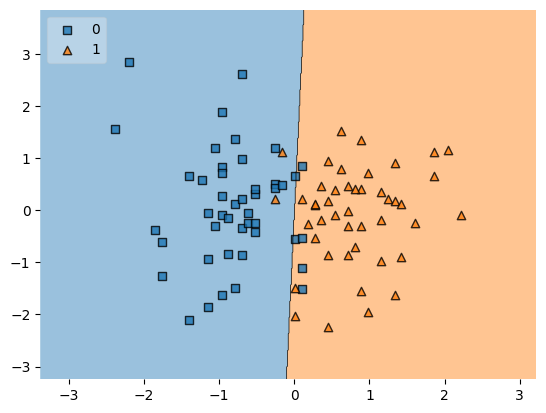

In [31]:
plot_decision_regions(X_train, y_train.values, clf=clf, legend=2)

In [32]:
import pickle

In [33]:
pickle.dump(clf,open('model.pkl','wb'))